# Assignment 4

## 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2. 回答一下理论题目

#### 1. What does a neuron compute?

神经元将输入信号乘以权重求和并加上偏置，然后通过激活函数得到输出

####  2. Why we use non-linear activation funcitons in neural networks?


使用线性函数会使神经网络的层数没有意义，因为如果使用线性函数作为激活函数会导致无论有多少层的隐藏层都能转化为一个线性函数表示。

#### 3. What is the 'Logistic Loss' ?

Logistic Loss是Logistic Regression的Loss函数，二分类问题是对数损失，多分类问题是交叉熵损失。

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

答案：C. sigmoid

#### 5. Why we don't use zero initialization for all parameters ?

如果初始化参数全为零，会使多个神经元的输出值相同，则每个神经元反向传播更新的参数都相同，导致不同神经元无法学习到不同的特征，失去了多个神经元的意义，相当于只有一个神经元。

#### 6. Can you implement the softmax function using python ? 

In [1]:
def softmax(z):
    '''
    Compute the softmax of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- softmax(z)
    '''
    return np.exp(z) / np.sum(np.exp(z))

## 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [3]:
# Loading the data 
digits = datasets.load_digits()

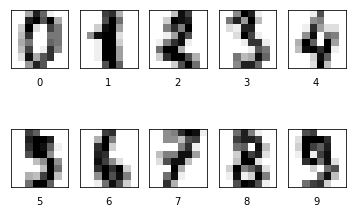

In [4]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [6]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

### 3- Architecture of the neural network

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [7]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    # 解决大于19，sigmoid返回1的问题
    z[z > 19.5] = 19.5
    s = 1 / (1 + np.exp(-z))
    
    return s

##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [8]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    # 正态分布
    w = np.random.normal(size=(dim, 1))
    b = np.random.normal()

    assert(w.shape == (dim,1))
    assert(isinstance(b,float))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X^T*(A-Y)$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [9]:
def propagate(w, b, X, Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    
    A = sigmoid(np.dot(X, w) + b)
    
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    
    dw = np.dot(X.T, (A - Y)) / m
    
    db = np.sum(A - Y) / m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    grads = {'dw':dw, 'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [11]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    y_pred -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    y_pred = sigmoid(np.dot(X, w) + b)
    
    y_pred = y_pred.squeeze()
    
    assert(y_pred.shape == (X.shape[0],))
    
    return y_pred

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [12]:
def fit_predict(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost=False):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    y_train - training label
    X_test - test set
    y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "costs":costs}
    """
    
    w, b = initialize_parameters(X_train.shape[1])
    
    params, grads, costs = optimize(w, b, X_train, y_train.reshape(y_train.shape[0], 1), num_iterations, learning_rate, print_cost=print_cost)
    
    y_train_pred = predict(params['w'], params['b'], X_train)

    y_train_pred[y_train_pred < 0.5] = 0
    y_train_pred[y_train_pred >= 0.5] = 1
    training_accuracy = np.sum(y_train_pred == y_train) / y_train.size
    
    y_test_pred = predict(params['w'], params['b'], X_test)
    
    y_test_pred[y_test_pred < 0.5] = 0
    y_test_pred[y_test_pred >= 0.5] = 1
    test_accuracy = np.sum(y_test_pred == y_test) / y_test.size
    
    return {
        "w": params['w'].squeeze(), 
        "b": params['b'], 
        "training_accuracy": training_accuracy, 
        "test_accuracy": test_accuracy, 
        "costs": costs
    }

In [13]:
result = fit_predict(X_train, y_train, X_test, y_test, 3000, 1e-2, print_cost=False)

### w

In [14]:
result['w']

array([-1.21866014, -0.81981429, -0.03551776,  0.01007036,  0.12517523,
        0.14468878, -0.00864456,  0.58231276,  2.2501605 , -0.29855307,
        0.14722133,  0.08286797, -0.05704881, -0.05799691,  0.094563  ,
        0.72020183,  0.47587078,  0.2212154 ,  0.13814193, -0.00691692,
       -0.22785175, -0.11522975, -0.23046885, -0.82904678,  0.16002359,
       -0.29114283,  0.10804093,  0.17481189,  0.04913468,  0.23261403,
       -0.16510015,  1.91141019, -0.77421737, -0.18903896, -0.09168604,
        0.27327393, -0.13078909, -0.05978335,  0.16191268, -1.57106045,
        0.52605482, -0.21000907,  0.1839726 , -0.10981681,  0.21212121,
        0.11933169,  0.00877658,  0.84464521,  0.88358985,  0.11602356,
       -0.0118733 , -0.07052497, -0.38370362, -0.05028487,  0.24436663,
       -0.54913411, -0.01580589,  0.09075985,  0.18629169, -0.12312284,
       -0.12774271, -0.09396828, -0.21625881,  0.25522322])

### b 

In [15]:
result['b']

-1.884940131853359

###  training accuracy

In [16]:
result['training_accuracy']

0.888641425389755

###  test accuracy

In [17]:
result['test_accuracy']

0.9022222222222223

### costs

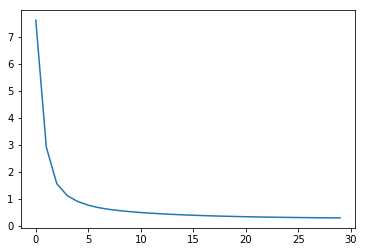

In [18]:
plt.plot(list(range(len(result['costs']))), result['costs'])

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [19]:
def plot_learning_curve_learning_rate(learning_rate, X_train, y_train, X_test, y_test, num_iterations=1000):
    learning_rate_score = []
    train_accuracy_score = []
    test_accuracy_score = []
    for _ in range(15):
        result = fit_predict(X_train, y_train, X_test, y_test, num_iterations, learning_rate , print_cost=False)
        learning_rate_score.append(learning_rate)
        train_accuracy_score.append(result['training_accuracy'])
        test_accuracy_score.append(result['test_accuracy'])
        
        learning_rate += 1e-3
    
    plt.plot(learning_rate_score, train_accuracy_score, label="train")
    plt.plot(learning_rate_score, test_accuracy_score, label="test")
    plt.legend()
    plt.show()

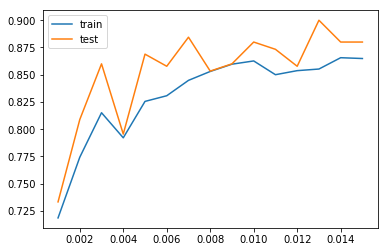

In [20]:
plot_learning_curve_learning_rate(1e-3, X_train, y_train, X_test, y_test)

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [21]:
def plot_learning_cure_iteration_num(num_iterations, X_train, y_train, X_test, y_test, learning_rate=1e-3):
    iteration_num_score = []
    train_accuracy_score = []
    test_accuracy_score = []
    for _ in range(15):
        result = fit_predict(X_train, y_train, X_test, y_test, num_iterations, learning_rate , print_cost=False)
        iteration_num_score.append(num_iterations)
        train_accuracy_score.append(result['training_accuracy'])
        test_accuracy_score.append(result['test_accuracy'])
        
        num_iterations += 500
    
    plt.plot(iteration_num_score, train_accuracy_score, label="train")
    plt.plot(iteration_num_score, test_accuracy_score, label="test")
    plt.legend()
    plt.show()

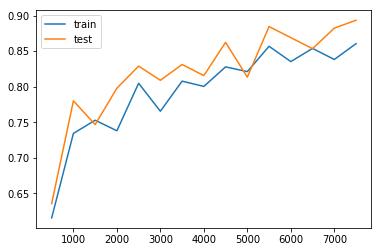

In [22]:
plot_learning_cure_iteration_num(500, X_train, y_train, X_test, y_test)

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

In [23]:
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,10)
    b -- initializaed scalar
    '''
    # 正态分布
    w = np.random.normal(size=(dim, 10))
    b = np.random.normal(size=(1, 10))

    assert(w.shape == (dim,10))
    assert(b.shape == (1,10))
    
    return w,b

In [24]:
def propagate(w, b, X ,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    
    tmp = np.dot(X, w) + b
    
    A = np.empty(tmp.shape)
    for i in range(tmp.shape[0]):
        A[i] = softmax(tmp[i])
    
    cost = -sum(np.dot(Y * np.log(A), np.ones((Y.shape[1], 1)))) / m
    
    dw = np.dot(X.T, A - Y) / m
    
    db = np.dot(np.ones((1, Y.shape[0])), A - Y) / m
    
    assert(dw.shape == w.shape)
    assert(db.shape == b.shape)
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [25]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [26]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0-9) for the examples in X
    '''
    
    tmp = np.dot(X, w) + b
    
    A = np.empty(tmp.shape)
    for i in range(tmp.shape[0]):
        A[i] = softmax(tmp[i])
    
    y_pred = A.argmax(axis=1)
    
    assert(y_pred.shape == (X.shape[0],))
    
    return y_pred

In [27]:
def fit_predict(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost=False):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    y_train - training label
    X_test - test set
    y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "costs":costs}
    """
    
    w, b = initialize_parameters(X_train.shape[1])
    
    y_pr_train = np.zeros((y_train.shape[0], 10))
    for i in range(y_train.shape[0]):
        y_pr_train[i][y_train[i]] = 1
    params, grads, costs = optimize(w, b, X_train, y_pr_train, num_iterations, learning_rate, print_cost=print_cost)
    
    y_train_pred = predict(params['w'], params['b'], X_train)

    training_accuracy = np.sum(y_train_pred == y_train) / y_train.size
    
    y_test_pred = predict(params['w'], params['b'], X_test)
    
    test_accuracy = np.sum(y_test_pred == y_test) / y_test.size
    
    return {
        "w": params['w'].T, 
        "b": params['b'], 
        "training_accuracy": training_accuracy, 
        "test_accuracy": test_accuracy, 
        "costs": costs
    }

In [28]:
result = fit_predict(X_train, y_train, X_test, y_test, 1000, 1e-2)

### w

In [29]:
result['w']

array([[ 9.81359076e-01, -1.47760918e-01,  6.60732807e-01,
         3.82339685e-01, -1.60736119e-01,  2.19044789e+00,
        -1.40068266e+00, -3.08383905e-01, -1.57317971e+00,
         1.13176499e+00, -9.18891403e-01, -6.13495340e-03,
         4.69358591e-01,  5.06751310e-01,  1.12347906e+00,
        -6.30428650e-01, -3.73511630e-01,  6.77103687e-02,
        -4.04400067e-01,  6.34049804e-01,  3.27479315e-01,
         3.55155266e-01,  1.09613425e-01,  3.17081284e-01,
         1.38605513e+00,  6.83877427e-02,  1.14100581e+00,
         3.78457890e-01,  2.82983723e-01, -3.99391308e-01,
         1.26337013e+00, -4.51239947e-01, -6.05480237e-01,
        -2.91500822e-01,  4.10903031e-01, -2.42331722e-02,
         1.03938340e+00,  6.09739737e-01, -8.88928587e-01,
        -2.61486246e-01,  6.04225095e-01,  5.59773244e-01,
         2.19677057e-01, -8.20307595e-01, -2.67651411e-01,
        -1.82894468e-01,  6.42976660e-01, -1.29181927e+00,
         4.11734199e-01, -2.62901732e-01, -6.79427453e-0

### b

In [30]:
result['b']

array([[-1.57986388, -0.08570777,  0.70185907,  0.69222954,  0.29250454,
         0.18756303,  0.3891807 ,  0.43494654, -0.74966595,  0.58759019]])

### training_accuracy

In [31]:
result['training_accuracy']

0.8730512249443207

### test_accuracy

In [32]:
result['test_accuracy']

0.8511111111111112

### costs

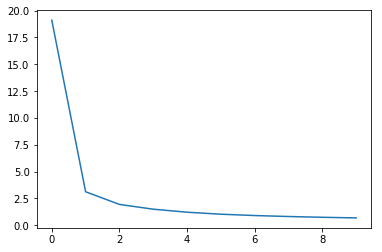

In [33]:
plt.plot(list(range(len(result['costs']))), result['costs'])

# Congratulations ! You have completed assigment 4. 